# Casos de COVID em todo o país

Números totais de pacientes COVID em termos de país

## Sobre o conjunto de dados

Este conjunto de dados contém o número total de casos de COVID-19 até agora em vários países. Inclui o total de casos, o total de óbitos, o total de recuperações e a percentagem de óbitos e recuperação

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


In [2]:
tabela = pd.read_csv(r'..\DtScience\Country-wise-COVID-cases.csv')
display(tabela)

,Country Name,Total Infected,Total Deaths,Total Recovered,Death %,Recovered %
0,USA,47916190,783565,37918301.0,1.6,79.1
1,India,34447536,463655,33849785.0,1.3,98.3
2,Brazil,21957967,611318,21151342.0,2.8,96.3
3,UK,9561099,142898,7825200.0,1.5,81.8
4,Russia,9109094,256597,7812557.0,2.8,85.8
...,...,...,...,...,...,...
207,Vanuatu,6,1,3.0,16.7,50.0
208,Marshall Islands,4,0,4.0,0.0,100.0
209,Samoa,3,0,3.0,0.0,100.0
210,Micronesia,1,0,1.0,0.0,100.0


In [3]:
tabela.columns=['Nome do país','Total de infectados', 'Total de óbitos', 'Total de recuperados', 'Morte %', 'Recuperados %']
display(tabela)

,Nome do país,Total de infectados,Total de óbitos,Total de recuperados,Morte %,Recuperados %
0,USA,47916190,783565,37918301.0,1.6,79.1
1,India,34447536,463655,33849785.0,1.3,98.3
2,Brazil,21957967,611318,21151342.0,2.8,96.3
3,UK,9561099,142898,7825200.0,1.5,81.8
4,Russia,9109094,256597,7812557.0,2.8,85.8
...,...,...,...,...,...,...
207,Vanuatu,6,1,3.0,16.7,50.0
208,Marshall Islands,4,0,4.0,0.0,100.0
209,Samoa,3,0,3.0,0.0,100.0
210,Micronesia,1,0,1.0,0.0,100.0


In [4]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nome do país          212 non-null    object 
 1   Total de infectados   212 non-null    int64  
 2   Total de óbitos       212 non-null    int64  
 3   Total de recuperados  211 non-null    float64
 4   Morte %               212 non-null    float64
 5   Recuperados %         212 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 10.1+ KB


In [5]:
tabela = tabela.dropna(how='all', axis=1)
tabela = tabela.dropna(how="any", axis=0)

In [6]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211 entries, 0 to 210
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nome do país          211 non-null    object 
 1   Total de infectados   211 non-null    int64  
 2   Total de óbitos       211 non-null    int64  
 3   Total de recuperados  211 non-null    float64
 4   Morte %               211 non-null    float64
 5   Recuperados %         211 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 11.5+ KB


In [7]:
tabela.isnull().sum()

Nome do país            0
Total de infectados     0
Total de óbitos         0
Total de recuperados    0
Morte %                 0
Recuperados %           0
dtype: int64

In [8]:
display(tabela)

,Nome do país,Total de infectados,Total de óbitos,Total de recuperados,Morte %,Recuperados %
0,USA,47916190,783565,37918301.0,1.6,79.1
1,India,34447536,463655,33849785.0,1.3,98.3
2,Brazil,21957967,611318,21151342.0,2.8,96.3
3,UK,9561099,142898,7825200.0,1.5,81.8
4,Russia,9109094,256597,7812557.0,2.8,85.8
...,...,...,...,...,...,...
206,Palau,8,0,8.0,0.0,100.0
207,Vanuatu,6,1,3.0,16.7,50.0
208,Marshall Islands,4,0,4.0,0.0,100.0
209,Samoa,3,0,3.0,0.0,100.0


In [9]:
porcento_morte = tabela[["Nome do país","Morte %"]].sort_values(by="Morte %", ascending=False)[:10]
porcento_morte

,Nome do país,Morte %
172,Yemen,19.4
207,Vanuatu,16.7
205,Western Sahara,10.0
21,Peru,9.1
129,Sudan,7.7
14,Mexico,7.6
60,Ecuador,6.3
125,Syria,5.8
142,Somalia,5.7
79,Egypt,5.7


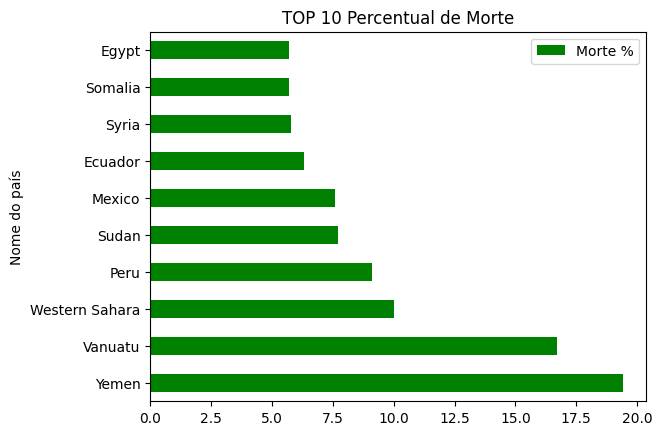

In [10]:
porcento_morte[:10].plot.barh(x='Nome do país', y='Morte %',color='green',title='TOP 10 Percentual de Morte');

In [11]:
top_Mortos = tabela[["Nome do país","Total de óbitos"]].sort_values(by="Total de óbitos", ascending=False)[:10]
top_Mortos

,Nome do país,Total de óbitos
0,USA,783565
2,Brazil,611318
1,India,463655
14,Mexico,291147
4,Russia,256597
21,Peru,200635
13,Indonesia,143670
3,UK,142898
12,Italy,132775
7,Iran,128272


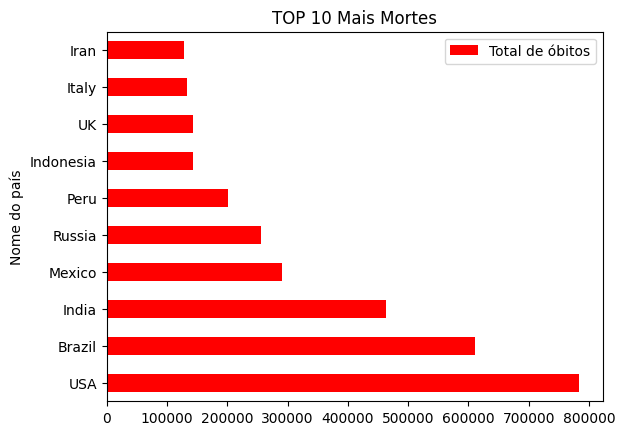

In [12]:
top_Mortos[:10].plot.barh(x='Nome do país', y='Total de óbitos',color='red',title='TOP 10 Mais Mortes');

In [13]:
menos_mortes = tabela[["Nome do país","Total de óbitos"]].sort_values(by="Total de óbitos", ascending=True)[:10]
menos_mortes

,Nome do país,Total de óbitos
210,Micronesia,0
208,Marshall Islands,0
206,Palau,0
204,Solomon Islands,0
202,Macao,0
209,Samoa,0
199,Greenland,0
207,Vanuatu,1
205,Western Sahara,1
203,Montserrat,1


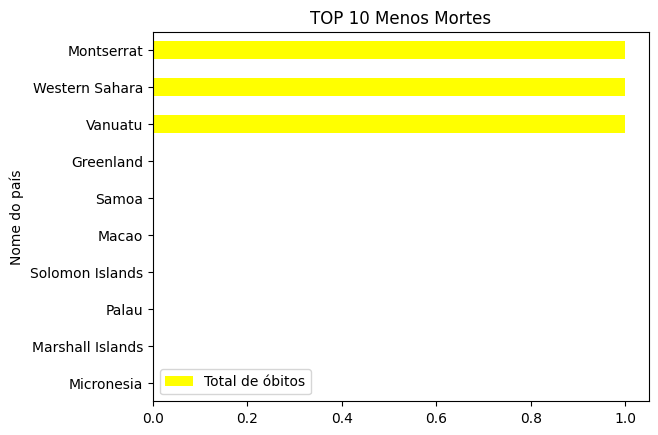

In [14]:
menos_mortes[:10].plot.barh(x='Nome do país', y='Total de óbitos',color='yellow',title='TOP 10 Menos Mortes');

In [15]:
recuperados = tabela[["Nome do país","Total de recuperados"]].sort_values(by="Total de recuperados", ascending=False)[:10]
recuperados

,Nome do país,Total de recuperados
0,USA,37918301.0
1,India,33849785.0
2,Brazil,21151342.0
5,Turkey,7888959.0
3,UK,7825200.0
4,Russia,7812557.0
6,France,7009026.0
7,Iran,5708253.0
8,Argentina,5172193.0
9,Spain,4889801.0


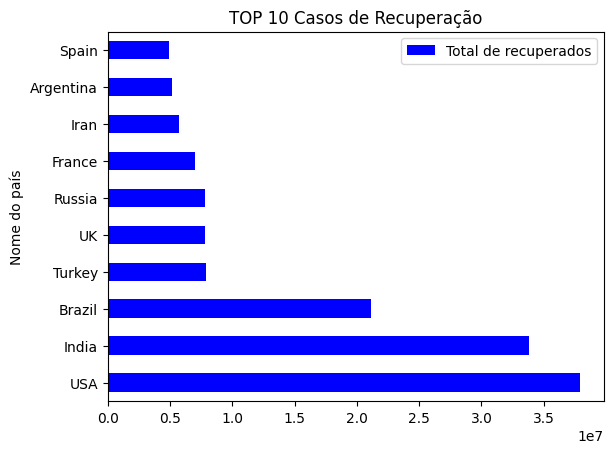

In [16]:
recuperados[:10].plot.barh(x='Nome do país', y='Total de recuperados',color='blue',title='TOP 10 Casos de Recuperação');

In [17]:
fig = px.scatter_geo(tabela, locations='Nome do país',locationmode="country names",scope="world",
color="Total de infectados",size="Total de infectados",size_max=65,title="Casos de Infetados Covid-19 pelo Mundo",color_continuous_scale="turbo")
fig.show()

fig = px.scatter_geo(tabela, locations='Nome do país',locationmode="country names",scope="world",
color="Total de óbitos",size="Total de óbitos",size_max=65,title="Casos de morte por Covid-19 no mundo",color_continuous_scale="hot")
fig.show()

fig = px.scatter_geo(tabela, locations='Nome do país',locationmode="country names",scope="world",
color="Total de recuperados",size="Total de recuperados",size_max=65,title="Covid-19 Cases of Recovered around the World",color_continuous_scale="solar")
fig.show()